<img src="https://brand.umich.edu/assets/brand/style-guide/logo-guidelines/U-M_Logo-Horizontal-Hex.png" alt="Drawing" style="width: 300px;" align="left"/><br>

# Week 1: Exploratory Data Analysis

A key idea behind data exploration is what John Behrens, who you will read in Week 3, refers to as building a “mental model” of the phenomenon of interest. The phenomenon of interest for the eventual model that you will start building in Week 3 is students' likelihood of not passing an online, self-directed course. In developing a mental model, we want you to think about what might be predictive of eventual course success. Oftentimes, what is predictive is commonsensical: students’ completion and performance on assessments, for example.

If you want additional examples, the optional reading by Kuzilek, Hlosta, Herrmannova, Zdrahal, Vaclavek,  & Wolf (2015) illustrates their efforts to build a classification model using Open University data, which is the same source as the data we will be exploring in this notebook.

Below are some starter ideas for features to explore. In looking at the list, think about how different actions that students take are translated into data that are collected and stored by the OU online system.
- Order of events
- Differences from class average / median
- % of learning resources accessed from a defined set
- Ratios of activities by "session" or day
- Time between events (i.e., gaps)
- Activity in "first 5 or 10 events" 
- Activity that "starts" a session or precedes / follows an assessment
- Differences from due dates (i.e., early / late)
- Scores on assignments
- Whether or not an assignment was turned in, regardless of score

The data work that we engage in for the purpose of “developing a mental model” in this first notebook will be much simpler as compared to the Notebooks 2 and 3, which are structured around unsupervised and supervised machine learning tasks, respectively. In many ways, this first notebook is intended to get you familiar with a typical “learning analytics” datasets that includes demographic, assessment, and log data.

### Dictionary
- **student_info.csv**
    - **id_student** = numeric; unique identifier for each student in the course
    - **gender** = character; M = "male", F = "female"
    - **highest_education** = character; “Some Graduate”, “Some Higher Education”, “High School + Advanced Placement”, “High School”, “No Formal Quals” (Categories ordered from highest documented education level attained to lowest documented education level attained)
    - **disability** = character; Y = "yes", N = "no"
    - **final_result** = character; "Fail", "Pass"


- **quizzes_tests.csv**
    - **id_student** = numeric; unique identifier for each student in the course
    - **assignment_name** = character; name of graded assignment (Quiz 1-7, Test 1-6, Final Exam)
    - **due_date** = numeric; date assignment was due (indexed as count in days from start of course, i.e., day 0)
    - **weight** = numeric; weight multiplied by score when generating final grade (weight * score / 100)
    - **date_submitted** = numeric; date student submitted assigned (indexed as count in days from start of course, i.e., day 0, NaN means students did not submit assignment)
    - **score** = numeric; score student earned on assignment (0 means students did not submit assignment)


- **learning_resources.csv**
    - **id_student** = numeric; unique identifier for each student in the course
    - **activity_type** = character; overarching label for learning activity students can access (“course_homepage”, “course_page”, “forum”, ‘resource”, “wiki”)
    - **activity_id** = numeric; unique identifier for specific learning activity student accessed within overacting `activity_type`
    - **date** = numeric; date student accessed specific `acitivity_id`  (indexed as count in days from start of course, i.e., day 0)
    - **sum_click** = numeric; count of clicks for `activity_id` on date

In [1]:
import pandas as pd

In [2]:
si = pd.read_csv("assets/student_info.csv")
qt = pd.read_csv("assets/quizzes_tests.csv")
lr = pd.read_csv("assets/learning_resources.csv")

In [3]:
si.head()

,id_student,gender,highest_education,disability,final_result
0,41060,M,Some Higher Education,N,Fail
1,45664,M,Some Higher Education,N,Pass
2,52014,F,High School,N,Fail
3,53488,F,Some Higher Education,N,Pass
4,60135,F,High School + Advanced Placement,N,Pass


In [4]:
qt.head()

,id_student,assignment_name,due_date,weight,date_submitted,score
0,41060,Quiz 1,23,2.0,25.0,77
1,41060,Test 1,25,7.5,24.0,85
2,41060,Quiz 2,51,3.0,54.0,94
3,41060,Test 2,53,10.0,53.0,86
4,41060,Quiz 3,79,3.0,81.0,94


In [5]:
lr.head()

,id_student,activity_type,activity_id,date,sum_click
0,420388,resource,219,0,1
1,420388,course_homepage,1,0,3
2,420388,course_page,87,0,1
3,420388,resource,229,0,2
4,420388,course_page,1,0,2


# 1. Explorations (20 points)

For our initial explorations, we will load each dataset and get a feel for the variables and the data type for each variable.

We have modified Open University data, focusing on a single course as well as simplifying `learning_resources.csv` and `quizzes_tests.csv` to make them easier to work with. Refer to the data dictionary, above, to learn about what is contained in each dataset. 

For the `quizzes_tests.csv` file, every student should have the same number of rows because each student had the opportunity to take the same quizzes and tests.

The `learning_resources.csv` file logs the number of times that a student accessed a specific file (i.e., a webpage, PDF file, or section of the course like Wiki or Forum). Students will have different numbers of rows based on the files they accessed. Under `activity_type`, example files include "course_homepage" (i.e., the main landing page for the course), "course_page" (i.e., a page with course-related content), “resource” (i.e., a PDF file that blends text, tables, and figures), and interactive sections of the course (i.e., Wiki or Forum).

**Note:** For these first tasks, you will be using a lot of `groupby`.

### Grading

1.1. (2 points) Identify how many students failed and passed the course

1.2. (2 points) Calculate course **pass rate** using `final_result` by `disability`

1.3. (2 points) Calculate course **pass rate** using `final_result` by `highest_education`

1.4. (2 points) Calculate course **pass rate** using `final_result` by `gender`

1.5. (2 points) Calculate **completion rate** for each `assignment_name`

1.6. (2 points) Identify the median, mean, and standard deviation for each `assignment_name` for all students

1.7. (2 points) Identify the median, mean, and standard deviation for each `assignment_name` for **only submitted** assignments

1.8. (2 points) Identify the top 10 most accessed learning resources by summing `sum_clicks`, grouped by `activity_type` and `activity_id`

1.9. (2 points) Create a data frame that represents the **number of unique students** who accessed any resource for each date

1.10. (2 points) Visualize the data frame from 1.9 as a line plot

## Student information

Let's start with the student information data. Each row is a unique student. First, identify the number of students who failed or passed the course.

1.1. (1 point) Identify how many students failed and passed the course

In [6]:
len(si['final_result'])

813

In [7]:
## Your code with comments
#Number of Students that Failed
# YOUR CODE HERE
Fail_filter = si[si['final_result']=='Fail']
len(Fail_filter)

303

In [8]:
#Number of Students that Passed
Pass_filter = si[si['final_result']=='Pass']
len(Pass_filter)

510

Next, we want to see if there are differences by `disability`, `highest_education`, and `gender` based on `final_result`. Because these groups have different overall counts, calculate percentages.

1.2. (2 points) Calculate pass rate using `final_result` by `disability`

In [9]:
## Your code with comments
# YOUR CODE HERE
disability_filter = si[si['disability']=='Y']
disability_filter.head()

,id_student,gender,highest_education,disability,final_result
7,67785,F,High School,Y,Pass
11,81351,M,Some Higher Education,Y,Fail
14,89051,M,High School + Advanced Placement,Y,Pass
15,92775,F,High School,Y,Fail
23,121000,F,High School,Y,Fail


In [10]:
#Calculating the quantity of the variable
fr_by_dis = disability_filter[disability_filter['final_result']=='Pass']
len(fr_by_dis)

52

In [11]:
#Calculating the percentage rounded to the nearest whole number
pr_of_fr_by_dis = len(fr_by_dis)/len(si['final_result'])
pr_of_fr_by_dis = round(pr_of_fr_by_dis*100)
pr_of_fr_by_dis

6

1.3. (2 points) Calculate pass rate using `final_result` by `highest_education`

In [12]:
#Determing the variables
unique = si['highest_education'].unique()
unique

array(['Some Higher Education', 'High School',
       'High School + Advanced Placement', 'Some Graduate',
       'No Formal Quals'], dtype=object)

In [13]:
## Your code with comments
#Calculating the quantity of the variable
# YOUR CODE HERE
highest_ed_she = si[si['highest_education']=='Some Higher Education']
len(highest_ed_she)

162

In [14]:
#Calculating the percentage rounded to the nearest whole number
pr_of_fr_by_he_she = len(highest_ed_she)/len(si['final_result'])
pr_of_fr_by_he_she = round(pr_of_fr_by_he_she*100)
pr_of_fr_by_he_she

20

In [15]:
#Calculating the quantity of the variable
highest_ed_hs = si[si['highest_education']=='High School']
len(highest_ed_hs)

271

In [16]:
#Calculating the percentage rounded to the nearest whole number
pr_of_fr_by_he_hs = len(highest_ed_hs)/len(si['final_result'])
pr_of_fr_by_he_hs = round(pr_of_fr_by_he_hs*100)
pr_of_fr_by_he_hs

33

In [17]:
#Calculating the quantity of the variable
highest_ed_hs_and_ap = si[si['highest_education']=='High School + Advanced Placement']
len(highest_ed_hs_and_ap)

362

In [18]:
#Calculating the percentage rounded to the nearest whole number
pr_of_fr_by_he_hs_and_ap = len(highest_ed_hs_and_ap)/len(si['final_result'])
pr_of_fr_by_he_she_hs_and_ap = round(pr_of_fr_by_he_hs_and_ap*100)
pr_of_fr_by_he_she_hs_and_ap

45

In [19]:
#Calculating the quantity of the variable
highest_ed_sg = si[si['highest_education']=='Some Graduate']
len(highest_ed_sg)

12

In [20]:
#Calculating the percentage rounded to the nearest whole number
pr_of_fr_by_he_sg = len(highest_ed_sg)/len(si['final_result'])
pr_of_fr_by_he_sg = round(pr_of_fr_by_he_sg*100)
pr_of_fr_by_he_sg

1

In [21]:
#Calculating the quantity of the variable
highest_ed_nfq = si[si['highest_education']=='No Formal Quals']
len(highest_ed_nfq)

6

In [22]:
#Calculating the percentage rounded to the nearest whole number
pr_of_fr_by_he_nfq = len(highest_ed_nfq)/len(si['final_result'])
pr_of_fr_by_he_nfq = round(pr_of_fr_by_he_nfq*100)
pr_of_fr_by_he_nfq

1

1.4. (2 points) Calculate pass rate using `final_result` by `gender`

In [23]:
## Your code with comments
#Calculating the quantity of the variable
# YOUR CODE HERE
gender_filter_F = si[si['gender']=='F']
len(gender_filter_F)

317

In [24]:
#Calculating the percentage rounded to the nearest whole number
pr_of_fr_by_gender_F = len(gender_filter_F)/len(si['final_result'])
pr_of_fr_by_gender_F = round(pr_of_fr_by_gender_F*100)
pr_of_fr_by_gender_F

39

In [25]:
#Calculating the quantity of the variable
gender_filter_M = si[si['gender']=='M']
len(gender_filter_M)

496

In [26]:
#Calculating the percentage rounded to the nearest whole number
pr_of_fr_by_gender_M = len(gender_filter_M)/len(si['final_result'])
pr_of_fr_by_gender_M = round(pr_of_fr_by_gender_M*100)
pr_of_fr_by_gender_M

61

## Quizzes and tests

For `quizzes_tests.csv`, we want to examine which assignments had high incompletes as well as the average scores for each assignment. To calculate incompletes, you will need to work with the `date_submitted` column. If a student did not submit an assignment, they will have an "NaN" under the `date_submitted`.

1.5. (2 points) Calculate **completion rate** for each `assignment_name`

The final table should be organized with 1 row per `assignment_name` and another column that calculates the percent of students who **submitted** the assignment.

In [27]:
## Your code with comments
# YOUR CODE HERE
qt

,id_student,assignment_name,due_date,weight,date_submitted,score
0,41060,Quiz 1,23,2.0,25.0,77
1,41060,Test 1,25,7.5,24.0,85
2,41060,Quiz 2,51,3.0,54.0,94
3,41060,Test 2,53,10.0,53.0,86
4,41060,Quiz 3,79,3.0,81.0,94
...,...,...,...,...,...,...
11377,2694933,Test 5,151,15.0,158.0,69
11378,2694933,Quiz 6,170,3.0,173.0,75
11379,2694933,Test 6,200,15.0,200.0,72
11380,2694933,Quiz 7,206,6.0,209.0,63


In [28]:
incomplete_filter = qt[qt['date_submitted'].isnull()]
incomplete_filter

,id_student,assignment_name,due_date,weight,date_submitted,score
11,41060,Test 6,200,15.0,NaN,0
12,41060,Quiz 7,206,6.0,NaN,0
13,41060,Final Exam,240,100.0,NaN,0
16,45664,Quiz 2,51,3.0,NaN,0
38,52014,Quiz 6,170,3.0,NaN,0
...,...,...,...,...,...,...
11348,2689536,Quiz 5,149,4.0,NaN,0
11349,2689536,Test 5,151,15.0,NaN,0
11350,2689536,Quiz 6,170,3.0,NaN,0
11351,2689536,Test 6,200,15.0,NaN,0


In [29]:
unique = incomplete_filter['assignment_name'].unique()
unique

array(['Test 6', 'Quiz 7', 'Final Exam', 'Quiz 2', 'Quiz 6', 'Test 4',
       'Quiz 3', 'Test 3', 'Quiz 4', 'Quiz 5', 'Test 5', 'Test 2',
       'Quiz 1', 'Test 1'], dtype=object)

In [30]:
#Determine the number of incompletes for Test 6
test_6_incomp_filter = incomplete_filter[incomplete_filter['assignment_name']=='Test 6']
len(test_6_incomp_filter)

319

In [31]:
#Calculate number of students who took Test 6
test_6_filter = qt[qt['assignment_name']=='Test 6']
len(test_6_filter)

813

In [32]:
#Calculate the percentage of completes for Test 6
a = 813 - 319
b = a/813
T6_percentage = round(b*100)
T6_percentage

61

In [33]:
#Determine the number of incompletes for Quiz 7
quiz_7_incomp_filter = incomplete_filter[incomplete_filter['assignment_name']=='Quiz 7']
len(quiz_7_incomp_filter)

304

In [34]:
#Calculate number of students who took Quiz 7
quiz_7_filter = qt[qt['assignment_name']=='Quiz 7']
len(quiz_7_filter)

813

In [35]:
#Calculate the percentage of completes for Quiz 7
a = 813 - 304
b = a/813
Q7_percentage = round(b*100)
Q7_percentage

63

In [36]:
#Determine the number of incompletes for Final Exam
Final_Exam_incomp_filter = incomplete_filter[incomplete_filter['assignment_name']=='Final Exam']
len(Final_Exam_incomp_filter)

211

In [37]:
#Calculate number of students who took Final Exam
Final_Exam_filter = qt[qt['assignment_name']=='Final Exam']
len(Final_Exam_filter)

813

In [38]:
#Calculate the percentage of completes for Final Exam
a = 813 - 211
b = a/813
FE_percentage = round(b*100)
FE_percentage

74

In [39]:
#Determine the number of incompletes for Quiz 2
Quiz_2_incomp_filter = incomplete_filter[incomplete_filter['assignment_name']=='Quiz 2']
len(Quiz_2_incomp_filter)

72

In [40]:
#Calculate number of students who took Quiz 2
Quiz_2_filter = qt[qt['assignment_name']=='Quiz 2']
len(Quiz_2_filter)

813

In [41]:
#Calculate the percentage of completes for Quiz 2
a = 813 - 72
b = a/813
Q2_percentage = round(b*100)
Q2_percentage

91

In [42]:
#Determine the number of incompletes for Quiz 6
Quiz_6_incomp_filter = incomplete_filter[incomplete_filter['assignment_name']=='Quiz 6']
len(Quiz_6_incomp_filter)

257

In [43]:
#Calculate number of students who took Quiz 6
Quiz_6_filter = qt[qt['assignment_name']=='Quiz 6']
len(Quiz_6_filter)

813

In [44]:
#Calculate the percentage of completes for Quiz 6
a = 813 - 257
b = a/813
Q6_percentage = round(b*100)
Q6_percentage

68

In [45]:
#Determine the number of incompletes for Test 4
Test_4_incomp_filter = incomplete_filter[incomplete_filter['assignment_name']=='Test 4']
len(Test_4_incomp_filter)

149

In [46]:
#Calculate number of students who took Test 4
Test_4_filter = qt[qt['assignment_name']=='Test 4']
len(Test_4_filter)

813

In [47]:
#Calculate the percentage of completes for Test 4
a = 813 - 149
b = a/813
T4_percentage = round(b*100)
T4_percentage

82

In [48]:
#Determine the number of incompletes for Quiz 3
Quiz_3_incomp_filter = incomplete_filter[incomplete_filter['assignment_name']=='Quiz 3']
len(Quiz_3_incomp_filter)

100

In [49]:
#Calculate number of students who took Quiz 3
Quiz_3_filter = qt[qt['assignment_name']=='Quiz 3']
len(Quiz_3_filter)

813

In [50]:
#Calculate the percentage of completes for Quiz 3
a = 813 - 100
b = a/813
Q3_percentage = round(b*100)
Q3_percentage

88

In [51]:
#Determine the number of incompletes for Test 3
Test_3_incomp_filter = incomplete_filter[incomplete_filter['assignment_name']=='Test 3']
len(Test_3_incomp_filter)

109

In [52]:
#Calculate number of students who took Test 3
Test_3_filter = qt[qt['assignment_name']=='Test 3']
len(Test_3_filter)

813

In [53]:
#Calculate the percentage of completes for Test 3
a = 813 - 109
b = a/813
T3_percentage = round(b*100)
T3_percentage

87

In [54]:
#Determine the number of incompletes for Quiz 4
Quiz_4_incomp_filter = incomplete_filter[incomplete_filter['assignment_name']=='Quiz 4']
len(Quiz_4_incomp_filter)

133

In [55]:
#Calculate number of students who took Quiz 4
Quiz_4_filter = qt[qt['assignment_name']=='Quiz 4']
len(Quiz_4_filter)

813

In [56]:
#Calculate the percentage of completes for Quiz 4
a = 813 - 133
b = a/813
Q4_percentage = round(b*100)
Q4_percentage

84

In [57]:
#Determine the number of incompletes for Quiz 5
Quiz_5_incomp_filter = incomplete_filter[incomplete_filter['assignment_name']=='Quiz 5']
len(Quiz_5_incomp_filter)

195

In [58]:
#Calculate number of students who took Quiz 5
Quiz_5_filter = qt[qt['assignment_name']=='Quiz 5']
len(Quiz_5_filter)

813

In [59]:
#Calculate the percentage of completes for Quiz 5
a = 813 - 195
b = a/813
Q5_percentage = round(b*100)
Q5_percentage

76

In [60]:
#Determine the number of incompletes for Test 5
Test_5_incomp_filter = incomplete_filter[incomplete_filter['assignment_name']=='Test 5']
len(Test_5_incomp_filter)

223

In [61]:
#Calculate number of students who took Test 5
Test_5_filter = qt[qt['assignment_name']=='Test 5']
len(Test_5_filter)

813

In [62]:
#Calculate the percentage of completes for Test 5
a = 813 - 223
b = a/813
T5_percentage = round(b*100)
T5_percentage

73

In [63]:
#Determine the number of incompletes for Test 2
Test_2_incomp_filter = incomplete_filter[incomplete_filter['assignment_name']=='Test 2']
len(Test_2_incomp_filter)

74

In [64]:
#Calculate number of students who took Test 2
Test_2_filter = qt[qt['assignment_name']=='Test 2']
len(Test_2_filter)

813

In [65]:
#Calculate the percentage of completes for Test 2
a = 813 - 74
b = a/813
T2_percentage = round(b*100)
T2_percentage

91

In [66]:
#Determine the number of incompletes for Quiz 1
Quiz_1_incomp_filter = incomplete_filter[incomplete_filter['assignment_name']=='Quiz 1']
len(Quiz_1_incomp_filter)

31

In [67]:
#Calculate number of students who took Quiz 1
Quiz_1_filter = qt[qt['assignment_name']=='Quiz 1']
len(Quiz_1_filter)

813

In [68]:
#Calculate the percentage of completes for Quiz 1
a = 813 - 31
b = a/813
Q1_percentage = round(b*100)
Q1_percentage

96

In [69]:
#Determine the number of incompletes for Test 1
Test_1_incomp_filter = incomplete_filter[incomplete_filter['assignment_name']=='Test 1']
len(Test_1_incomp_filter)

25

In [70]:
#Calculate number of students who took Test 1
Test_1_filter = qt[qt['assignment_name']=='Test 1']
len(Test_1_filter)

813

In [71]:
#Calculate the percentage of completes for Test 1
a = 813 - 25
b = a/813
T1_percentage = round(b*100)
T1_percentage

97

In [72]:
d = {'assignment_name':['Quiz 1', 'Quiz 2', 'Quiz 3', 'Quiz 4', 'Quiz 5', 'Quiz 6', 'Quiz 7', 'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5', 'Test 6', 'Final Exam'], 'percent_submitted':[96, 91, 88, 84, 76, 68, 63, 97, 91, 87, 82, 73, 61, 74]}
completed_assignments_df = pd.DataFrame(data=d)
completed_assignments_df

,assignment_name,percent_submitted
0,Quiz 1,96
1,Quiz 2,91
2,Quiz 3,88
3,Quiz 4,84
4,Quiz 5,76
5,Quiz 6,68
6,Quiz 7,63
7,Test 1,97
8,Test 2,91
9,Test 3,87


Using a similar organization as the table above, i.e., 1 row per assignment, calculate the median, mean, and standard deviation for each assignment `score`. We will do this twice. Once for all students and another for **only students who submitted an assignment**. The `score` column is "0" for students who did not turn in an assignment, i.e., `date_submitted` equals "NaN". Thus, for the first table, you will include students with “NaN in `date_submitted`, and for the second table, you will remove students with "NaN" before calculating median, mean, and standard deviation.

1.6. (2 points) Identify the median, mean, and standard deviation for each `assignment_name` for all students

In [73]:
## Your code with comments
# YOUR CODE HERE
test_1_score_filter = qt.groupby(['assignment_name'])['score']
mean_test_1 = test_1_score_filter.mean()
mean_test_1 = round(mean_test_1, 2)
median_test_1 = test_1_score_filter.median()
sd_test_1 = test_1_score_filter.std()
sd_test_1 = round(sd_test_1, 2)
print('mean_test_1 =', mean_test_1, 'median_test_1 =', median_test_1, 'sd_test_1 =', sd_test_1)

mean_test_1 = assignment_name
Final Exam    41.73
Quiz 1        66.57
Quiz 2        75.22
Quiz 3        63.54
Quiz 4        61.41
Quiz 5        57.75
Quiz 6        48.21
Quiz 7        40.10
Test 1        71.08
Test 2        66.99
Test 3        67.55
Test 4        56.23
Test 5        47.73
Test 6        36.35
Name: score, dtype: float64 median_test_1 = assignment_name
Final Exam    47.0
Quiz 1        70.0
Quiz 2        83.0
Quiz 3        72.0
Quiz 4        72.0
Quiz 5        74.0
Quiz 6        61.0
Quiz 7        45.0
Test 1        76.0
Test 2        75.0
Test 3        80.0
Test 4        67.0
Test 5        58.0
Test 6        35.0
Name: score, dtype: float64 sd_test_1 = assignment_name
Final Exam    28.80
Quiz 1        22.86
Quiz 2        27.88
Quiz 3        30.38
Quiz 4        32.36
Quiz 5        36.36
Quiz 6        36.63
Quiz 7        35.40
Test 1        20.02
Test 2        26.69
Test 3        31.51
Test 4        33.24
Test 5        34.17
Test 6        34.21
Name: score, dtype: float64


1.7. (2 points) Identify the median, mean, and standard deviation for each `assignment_name` for **only submitted** assignments

In [74]:
## Your code with comments
# YOUR CODE HERE
qt = qt.dropna()
test_1_score_filter = qt.groupby(['assignment_name'])['score']
mean_test_1 = test_1_score_filter.mean()
mean_test_1 = round(mean_test_1, 2)
median_test_1 = test_1_score_filter.median()
sd_test_1 = test_1_score_filter.std()
sd_test_1 = round(sd_test_1, 2)
print('mean_test_1 =', mean_test_1, 'median_test_1 =', median_test_1, 'sd_test_1 =', sd_test_1)

mean_test_1 = assignment_name
Final Exam    56.35
Quiz 1        69.21
Quiz 2        82.53
Quiz 3        72.45
Quiz 4        73.42
Quiz 5        75.97
Quiz 6        70.50
Quiz 7        64.05
Test 1        73.34
Test 2        73.70
Test 3        78.01
Test 4        68.84
Test 5        65.78
Test 6        59.83
Name: score, dtype: float64 median_test_1 = assignment_name
Final Exam    56.0
Quiz 1        70.0
Quiz 2        86.0
Quiz 3        75.0
Quiz 4        78.0
Quiz 5        81.0
Quiz 6        73.5
Quiz 7        68.0
Test 1        77.0
Test 2        77.0
Test 3        84.0
Test 4        74.0
Test 5        69.0
Test 6        65.0
Name: score, dtype: float64 sd_test_1 = assignment_name
Final Exam    17.19
Quiz 1        18.99
Quiz 2        15.77
Quiz 3        20.16
Quiz 4        19.21
Quiz 5        18.80
Quiz 6        19.74
Quiz 7        21.59
Test 1        15.74
Test 2        16.99
Test 3        18.15
Test 4        21.98
Test 5        20.51
Test 6        22.81
Name: score, dtype: float64


## Learning resources

The `learning_resources.csv` file is the largest yet perhaps most equivocal dataset that we will work with. For these first manipulations, we will look at the top 10 most accessed resources and then students' total activity by `date`.

To generate the top 10 list, we will use `groupby` across the entire dataset by `activity_type` and `activity_id`. The reason we need to use both columns in our `groupby` is that `activity_id` names the specific learning resource within an `activity_type`. For top 10 most accessed list, we will sum the `sum_click` column.

1.8. (2 points) Identify the top 10 most accessed learning resources by summing `sum_clicks`, grouped by `activity_type` and `activity_id`

In [75]:
lr

,id_student,activity_type,activity_id,date,sum_click
0,420388,resource,219,0,1
1,420388,course_homepage,1,0,3
2,420388,course_page,87,0,1
3,420388,resource,229,0,2
4,420388,course_page,1,0,2
...,...,...,...,...,...
443331,536170,resource,135,240,2
443332,536926,course_homepage,1,240,1
443333,556295,course_homepage,1,240,3
443334,556780,course_homepage,1,240,1


In [76]:
lr['activity_type'].unique()

array(['resource', 'course_homepage', 'course_page', 'forum', 'wiki'],
      dtype=object)

In [77]:
## Your code with comments
# YOUR CODE HERE
activity_group = lr.groupby(['activity_type','activity_id'])['sum_click'].sum()
activity_group = pd.DataFrame(activity_group)
activity_group = activity_group.reset_index()
activity_group_sorted_by_sum_click = activity_group.sort_values('sum_click', ascending=False)
top_10_sum_click = activity_group_sorted_by_sum_click.nlargest(n=10, columns=['sum_click'])
top_10_sum_click

,activity_type,activity_id,sum_click
0,course_homepage,1,328573
124,forum,4,211088
394,wiki,7,45076
5,course_page,5,30820
393,wiki,6,27679
127,forum,7,25740
103,course_page,103,25285
2,course_page,2,23695
6,course_page,6,22991
7,course_page,7,22297


Next, we want to see how many students are active each day. Using `learning_resources` create a data frame that represents the number of unique students who accessed any resource for each date and visualize it at as a line plot.

1.9. (2 points) Create a data frame that represents the **number of unique students** who accessed any resource for each date

In [78]:
## Your code with comments
# YOUR CODE HERE
grouped = lr.groupby(['date'])['id_student'].nunique()

grouped

date
0      752
1      360
2      434
3      445
4      394
      ... 
236    129
237     93
238     60
239     80
240    109
Name: id_student, Length: 241, dtype: int64

1.10. (2 points) Visualize the data frame from 1.9 as a line plot

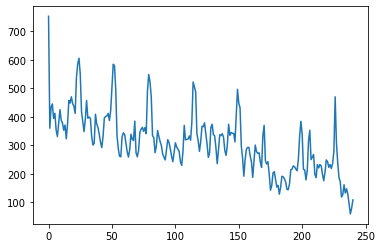

In [79]:
## Your code with comments
# YOUR CODE HERE
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(grouped)

# 2. Joins (20 points)

After examining each file and carrying out a few manipulations, you should have a good idea of what is represented in each dataset. Now, you will join these files together.

In joining files together, you will largely leave `student_info.csv` as is. `quizzes_tests.csv` and `learning_resources.csv`, however, are long-form, which means that you will need to be strategic in combining `student_info.csv`, which is wide-form.

## Grading

2.1. (2 points) Filter `quizzes_tests.csv` to include only “Quiz 1”, “Quiz 2”, “Test 1”, and “Test 2”

2.2. (2 points) Join data frame from 2.1 onto `student_info.csv` by `id_student`

2.3. (5 points) Create a grouped box plot with weighted score (`weight` * `score`/100) on the y-axis and "Quiz 1”, “Quiz 2”, “Test 1”, and “Test 2” on the x-axis; use `final_result` to color each box plot, one for "fail" and one for "pass"

2.4. (2 points) Filter `learning_resources.csv` to include only "Resource" `activity_type`

2.5. (2 points) Sum `sum_clicks` by `activity_type` per student 

2.6. (2 points) Join data frame from 2.5 onto `student_info.csv` by `id_student`

2.7. (5 points) Using data frame from 2.6, create a box plot with `sum_clicks` on the y-axis and `activity_type` (i.e., “course_homepage”, “course_page”, “forum”, "resource”, and “wiki”) on the x-axis; use `final_result` to color each box plot, one for "fail" and one for "pass"

For `quizzes_tests.csv`, we are going to select "Quiz 1" and "Quiz 2" and "Test 1" and "Test 2" for each student. Then, we are going to join on `student_info`.

2.1. (2 points) Filter `quizzes_tests.csv` to include only “Quiz 1”, “Quiz 2”, “Test 1”, and “Test 2”

In [80]:
qt.head()

,id_student,assignment_name,due_date,weight,date_submitted,score
0,41060,Quiz 1,23,2.0,25.0,77
1,41060,Test 1,25,7.5,24.0,85
2,41060,Quiz 2,51,3.0,54.0,94
3,41060,Test 2,53,10.0,53.0,86
4,41060,Quiz 3,79,3.0,81.0,94


In [81]:
## Your code with comments
# YOUR CODE HERE
filter_q1_df = qt[qt['assignment_name']=='Quiz 1']
filter_q2_df = qt[qt['assignment_name']=='Quiz 2']
filter_t1_df = qt[qt['assignment_name']=='Test 1']
filter_t2_df = qt[qt['assignment_name']=='Test 2']
df_list = [filter_q1_df, filter_q2_df, filter_t1_df, filter_t2_df]
df = pd.concat(df_list)
df


,id_student,assignment_name,due_date,weight,date_submitted,score
0,41060,Quiz 1,23,2.0,25.0,77
14,45664,Quiz 1,23,2.0,25.0,47
28,52014,Quiz 1,23,2.0,25.0,53
42,53488,Quiz 1,23,2.0,25.0,93
56,60135,Quiz 1,23,2.0,25.0,57
...,...,...,...,...,...,...
11315,2678338,Test 2,53,10.0,53.0,72
11329,2683836,Test 2,53,10.0,46.0,78
11343,2689536,Test 2,53,10.0,52.0,86
11357,2693243,Test 2,53,10.0,52.0,75


2.2. (2 points) Join data frame from 2.1 onto `student_info.csv` by `id_student`

In [82]:
## Your code with comments
# YOUR CODE HERE
df_merged = si.merge(df, how="right", on=["id_student"])
df_merged.head()

,id_student,gender,highest_education,disability,final_result,assignment_name,due_date,weight,date_submitted,score
0,41060,M,Some Higher Education,N,Fail,Quiz 1,23,2.0,25.0,77
1,45664,M,Some Higher Education,N,Pass,Quiz 1,23,2.0,25.0,47
2,52014,F,High School,N,Fail,Quiz 1,23,2.0,25.0,53
3,53488,F,Some Higher Education,N,Pass,Quiz 1,23,2.0,25.0,93
4,60135,F,High School + Advanced Placement,N,Pass,Quiz 1,23,2.0,25.0,57


2.3. (5 points) Create a grouped box plot with weighted score (`weight` * `score`/100) on the y-axis and "Quiz 1”, “Quiz 2”, “Test 1”, and “Test 2” on the x-axis; use `final_result` to color each box plot, one for "fail" and one for "pass"

<AxesSubplot:xlabel='assignment_name'>

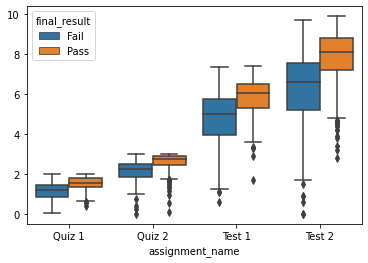

In [83]:
## Your code with comments
# YOUR CODE HERE
import seaborn as sns

#score = df_merged['score']
#weight = df_merged['weight']
#df1 = pd.DataFrame(df_merged, columns=['assignment_name','final_result','score', 'weight'])
#sns.boxplot(df1, x=df1['assignment_name'],
#                 y= weight*score/100,
#                 hue = df1['final_result'])

score = df_merged['score']
weight = df_merged['weight']
sns.boxplot(x = df_merged['assignment_name'],
            y = weight*score/100,
            hue = df_merged['final_result'])

2.4. (2 points) Filter `learning_resources.csv` to include only "Resource" `activity_type`

In [84]:
## Your code with comments
# YOUR CODE HERE
resource_filter = lr[lr['activity_type']=='resource']
resource_filter

,id_student,activity_type,activity_id,date,sum_click
0,420388,resource,219,0,1
3,420388,resource,229,0,2
8,409109,resource,219,0,1
9,409109,resource,229,0,2
11,409109,resource,246,0,1
...,...,...,...,...,...
443308,544839,resource,246,240,3
443311,557742,resource,246,240,1
443314,560444,resource,246,240,3
443321,535831,resource,246,240,1


2.5. (2 points) Sum `sum_clicks` by `activity_type` per student 

In [85]:
lr = pd.read_csv("assets/learning_resources.csv")

In [86]:
lr.activity_type.unique()

array(['resource', 'course_homepage', 'course_page', 'forum', 'wiki'],
      dtype=object)

In [87]:
lr

,id_student,activity_type,activity_id,date,sum_click
0,420388,resource,219,0,1
1,420388,course_homepage,1,0,3
2,420388,course_page,87,0,1
3,420388,resource,229,0,2
4,420388,course_page,1,0,2
...,...,...,...,...,...
443331,536170,resource,135,240,2
443332,536926,course_homepage,1,240,1
443333,556295,course_homepage,1,240,3
443334,556780,course_homepage,1,240,1


In [88]:
l = pd.read_csv("assets/learning_resources.csv")
l

,id_student,activity_type,activity_id,date,sum_click
0,420388,resource,219,0,1
1,420388,course_homepage,1,0,3
2,420388,course_page,87,0,1
3,420388,resource,229,0,2
4,420388,course_page,1,0,2
...,...,...,...,...,...
443331,536170,resource,135,240,2
443332,536926,course_homepage,1,240,1
443333,556295,course_homepage,1,240,3
443334,556780,course_homepage,1,240,1


In [89]:
sum_click_activity_type_per_student1 = l.groupby(['activity_type','id_student'])['sum_click'].sum()
sum_click_activity_type_per_student1 = pd.DataFrame(sum_click_activity_type_per_student1)
sum_click_activity_type_per_student1 = sum_click_activity_type_per_student1.reset_index()
sum_click_activity_type_per_student1.shape

(3969, 3)

2.6. (2 points) Join data frame from 2.5 onto `student_info.csv` by `id_student`

In [90]:
si.head()

,id_student,gender,highest_education,disability,final_result
0,41060,M,Some Higher Education,N,Fail
1,45664,M,Some Higher Education,N,Pass
2,52014,F,High School,N,Fail
3,53488,F,Some Higher Education,N,Pass
4,60135,F,High School + Advanced Placement,N,Pass


In [91]:
## Your code with comments
# YOUR CODE HERE
join_2 = si.merge(sum_click_activity_type_per_student1, how='right', on=['id_student'])
join_2.head()

,id_student,gender,highest_education,disability,final_result,activity_type,sum_click
0,41060,M,Some Higher Education,N,Fail,course_homepage,80
1,45664,M,Some Higher Education,N,Pass,course_homepage,287
2,52014,F,High School,N,Fail,course_homepage,98
3,53488,F,Some Higher Education,N,Pass,course_homepage,311
4,60135,F,High School + Advanced Placement,N,Pass,course_homepage,822


2.7. (5 points) Using data frame from 2.6, create a box plot with `sum_clicks` on the y-axis and `activity_type` (i.e., “course_homepage”, “course_page”, “forum”, "resource”, and “wiki”) on the x-axis; use `final_result` to color each box plot, one for "fail" and one for "pass"

<AxesSubplot:xlabel='activity_type', ylabel='sum_click'>

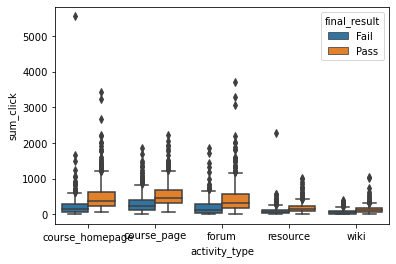

In [92]:
## Your code with comments
# YOUR CODE HERE
import seaborn as sns

activity = join_2['activity_type']
sum_clicks = join_2['sum_click']
final_result = join_2['final_result']
sns.boxplot(x = activity,
            y = sum_clicks,
            hue = final_result)

# 3. Interpret (10 points)

After developing an initial understanding of the above datasets, provide your thoughts on the following questions:

3.1. What variables from `quizzes_tests.csv` and `learning_resources.csv` are related to course success, and why? (5 points)

In Q1.5 and Q1.10, a trending decrease in completion of quizzes/tests and accessing of course resources can be observed as time passes.  This could be due to more work from other courses making it harder for students to find time to study efficiently for this course if their time-management skills are not developed.  Specific variables that can be related to course success while observing the charts created are score, final_result, and assignment_name.  There were more completions and fewer absences for the tests compared to the quizzes under the assignment_name column.  An increase in the weight varaible seemed to increase attendance to the tests versus the quizzes also.  After graphing the sum_click and activity_type variables, it can be seen more attention was given towards the required assignments; at course_page, course_homepage variables, and forum; and less given towards the extra resources provided (resource and wiki).  This could be due to students being occupied with other courses and not having enough extra time to utilize the extra resources, or the students just did not feel the need to refer to the extra resources when completing the assignments.  

Lack of usage of the extra resources provided, as well as lack of respect given towards the lower-weighted quizzes versus the higher-weighted tests, are conclusions that can be made while viewing these graphs.  Key variables to focus on when considering change in the program, with the goal of improving students' scores, would be increasing the weight of quizzes and decreasing slightly the weight of tests.  An increase of value in the quizzes will encourage more students to take the quiz-dates more seriously, the entire course more seriously, and can have a large impact on the steady decline in grades currently observed as the semester passes.  Being required to take the quizzes more seriously, and spend more time preparing for the quizzes the same as they do for the tests, will also further encourage student utilization of the extra resources provided.  These extra resources could also be the key to helping the students prevent their grade declinations as the semester passes.   

3.2. What relationships between variables from `quizzes_tests.csv` and `learning_resources.csv` and `final_result` surprised you, and why? (5 points)

With my 6-7 years of teaching-experience grades K-12, and my 12 years of tutoring experience, I'm not really surprised about the steady decline in grades as the semester passes and the lack of utilizing additional resources.  This is a common trend I have already observed in multiple schools, both private and public.  A large factor that causes this problem is the lack of motivation and encouragement provided to the students by teachers, faculty, and parents.  Some teachers/parents still follow the traditional path of scolding their young children/teenager for poor grades, yet do not realize the discouragement (and lack of encouragement) that is contained within a scolding.  Not all youth are capable of taking a scolding and turning it into motivation to try-harder and perform-better, and the process of learning how to transform a scolding into motivation can be very traumatic/emotional. The current grading system for most schools can also be viewed as a type of 'scolding' when a student has put sufficient effort into the assignment but still is given a poor grade (C or lower).  A better mix of sincerity and encouragement needs to be developed into the schools' grading systems and the way teachers are teaching students.  Many teachers are never educated on how to properly motivate and encourage students through different styles of teaching, or are never encouraged by their peers and superiors to continue doing so. A new school system, located in the Western states, has recently been started that replaces tests/exams with group-projects and more development of communication skills for the students.  This is a great start in the right direction, but could be enhanced even more with more educators that are taught how to better measure/evaluate confidence-levels in students, and with more required field-trips that provide the students the opportunity to gain more experience becoming involved in their local communities.  Encouragement of more constructive feedback, coming from both the parents and the teaching-faculty towards the students, is also a critical factor that needs improvement in many school systems.  Creating a constructive-feedback outline/protocol for teachers and parents to follow, involving a protocol for what the teachers/parents should write and the minimum amount they should write...as well as an outline guiding the teachers/parents towards encouraging-consultation with the struggling student at a certain point, may be necessary before better communication can be established and better grades can be developed.  Many parents have never been educated on how to properly counsel their children and could use multiple seminars/handouts for assistance.  I still experience professors who do not provide enough constructive feedback for the students to utilize for improvement. Lack of development of time-management skills also play a critical factor in the struggle students have with balancing course workloads.      